# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма,

**План работ**

**Шаг 1. Открыть файл с данными и изучите общую информацию**

- Скачать датасет
- Загрузить данные из файла в датафрейм.
- Изучить общую информацию о полученном датафрейме.
- Построить общую гистограмму для всех столбцов таблицы. 

**Шаг 2. Предобработка данных**
- Найти и по-возможности исправить пропуски.
- Преобразовать тип данных в выбранных столбцах.
- Исправить неявные дублиаты в столбце с названиями.
- Найти и устраните редкие и выбивающиеся значения.

**Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:**
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**Шаг 4. Провести исследовательский анализ данных:**
1. Изучить следующие параметры объектов. Постройте отдельные гистограммы для каждого из этих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
2. Изучить, как быстро продавались квартиры. 
- Построить гистограмму.
- Посчитать среднее и медиану.
- Описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Построить графики, которые покажут зависимость цены от указанных выше параметров.
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

**Шаг 5. Написать общий вывод**

### Откройте файл с данными и изучите общую информацию. 

In [91]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy.stats import spearmanr

In [92]:
df = pd.read_csv("real_estate_data.csv", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [93]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [94]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


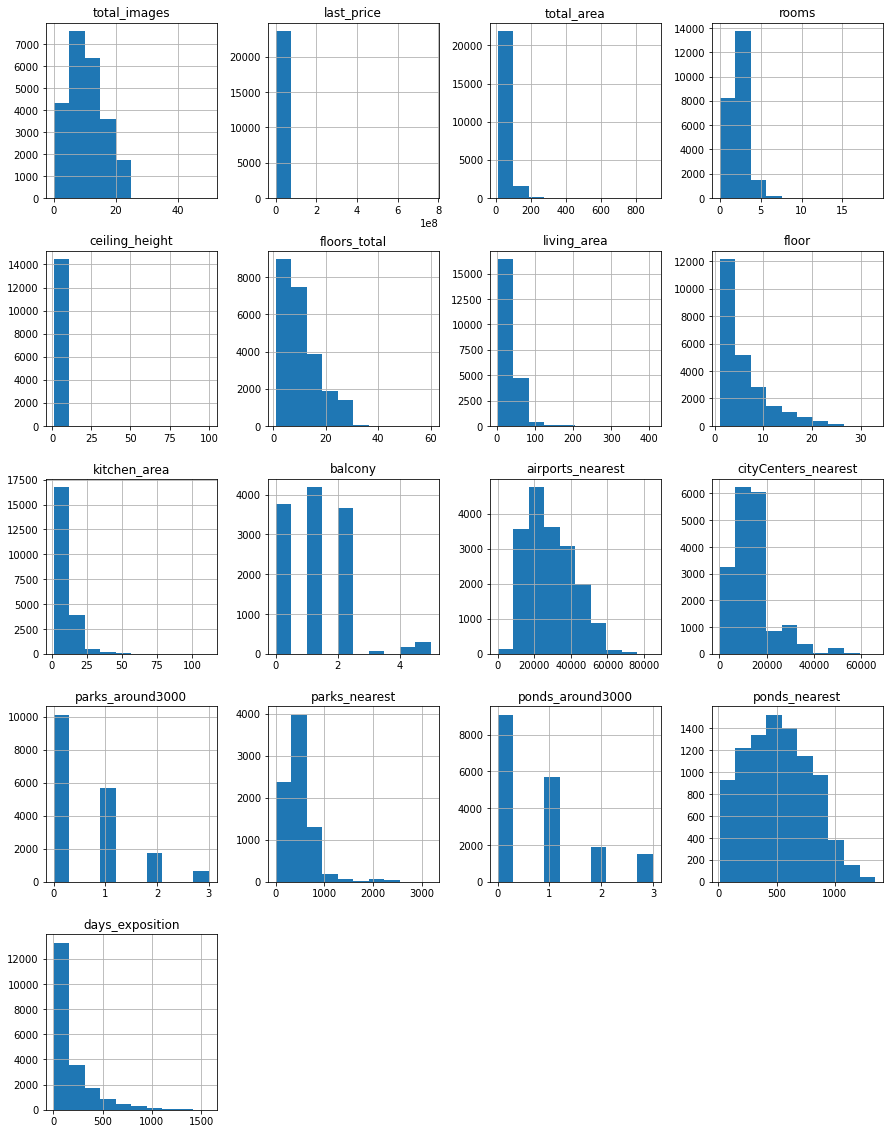

In [95]:
df.hist(figsize=(15, 20));

In [96]:
N_BEFORE_PROCESSING = len(df) # Для проверки сколько убрали при обработки

**Вывод:** Данные загружены. В качестве разделителя в csv использовалась табуляция. Судя по описанию столбцов, статистике и гистограммам в данных присутствуют несоответстуия типа, пропущенные и нетипичные значения.

### Предобработка данных

#### Заполнение пропущенных значений

Пропущенные значения присутствуют в столбцах:

In [97]:
for col in df.columns:
    nNaN = df[col].isna().sum()
    if nNaN:
        print(f"{col}: {nNaN}")

ceiling_height: 9195
floors_total: 86
living_area: 1903
is_apartment: 20924
kitchen_area: 2278
balcony: 11519
locality_name: 49
airports_nearest: 5542
cityCenters_nearest: 5519
parks_around3000: 5518
parks_nearest: 15620
ponds_around3000: 5518
ponds_nearest: 14589
days_exposition: 3181


In [98]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

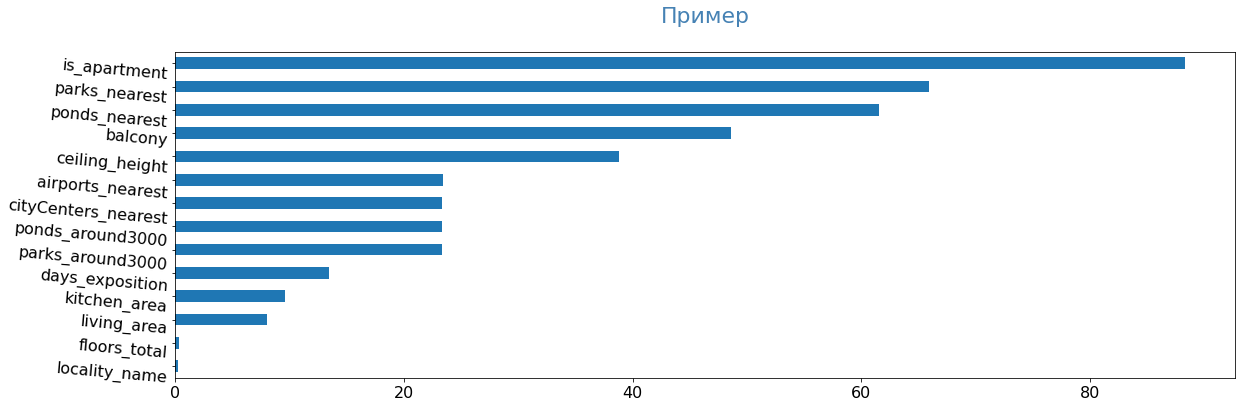

In [99]:
pass_value_barh(df)

Обработем сначала более очевидные пропуски. 
Аппартаменты ("is_apartment") в РФ  пока малораспространены и не все знают, что это значит. Но если человек знает что у него аппартаменты, то он скорее всего укажет их. Поэтому заполняем пропуски значением **False**.

In [100]:
df["is_apartment"] = df["is_apartment"].fillna(False)

Если у человека нет балкона в квартире ("balcony"), то он считает, что можно и не заполнять, а мы заполним 0.

In [101]:
df["balcony"] = df["balcony"].fillna(0)

Название пропущенного населённого пункта ("locality_name") нам узнать невозможно, если совсем не вдаваться в детективаное дело. Поэтому меняем пропуски на неизвестные.

In [102]:
df["locality_name"] = df["locality_name"].fillna("unknown")

В столбце высоты потолка пропустили много значений и забегая вперёд довольно много нетипичных значений. Пропуски связаны с тем,что людям лень измерять потолок и для многих покупателей это некритично. Для красоты можем заполнить медианой но после исправления нетипичных значений.

Проанализируем пропуски в столбце floors_total.

In [103]:
df[df["floors_total"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Никакой особой закономерности нет. Пропущенных значений мало. Можно либо оставить как есть либо заполнить медианой. Для большей точности лучше заполнить медианой по-насленному пункту. Но мы ещё не разобрались с неявными дубликатами в названиях поэтому оставим пока этот шаг.

Разбираемся с площадями. Площадь кухни зависит от проекта дома. Таких данных в датасете нет. Можно конечно по косвенным данным определить для некоторых случаев тип проекта, но на сколько это необходимо? Заполняем медианой. 

In [104]:
df["kitchen_area"] = df["kitchen_area"].fillna(df["kitchen_area"].median())

С жилой площадью сложнее она зависит как от проекта так и от количества комнат. Заполняем медианой сгруппированной по количеству комнат.

In [105]:
df["living_area"] = df.groupby("rooms")["living_area"].transform(lambda x: x.fillna(x.median()))

Однако из за таких манипуляций могли появится резиновые квартиры где сумма жилой площади и площади кухни больше общей. Проверяем.

In [106]:
df.query('(kitchen_area + living_area) > 0.9*total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,NaN,24.0,15.5,2,False,...,9.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
164,6,800000.0,40.3,2018-06-25T00:00:00,2,NaN,3.0,30.5,1,False,...,9.1,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,NaN,9.0,18.0,8,False,...,9.1,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,NaN,5.0,30.5,1,False,...,9.1,0.0,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0
23613,4,3950000.0,52.0,2018-03-04T00:00:00,3,NaN,5.0,45.0,2,False,...,9.1,0.0,посёлок Парголово,55549.0,21223.0,0.0,NaN,0.0,NaN,45.0
23637,8,2350000.0,26.0,2018-06-26T00:00:00,0,NaN,25.0,17.0,4,False,...,9.1,2.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,207.0


Таких значений немного и есть надежда что мы их исправим на следующем шаге.

In [107]:
# check
df[df['total_area']*0.95 <= (df ['living_area'] + df['kitchen_area'])][['total_area'
                                                                              ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
164,40.3,30.5,9.1
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
...,...,...,...
23554,26.0,18.0,9.1
23579,24.8,18.0,9.1
23613,52.0,45.0,9.1
23637,26.0,17.0,9.1


Займёмся географией. Сперва обработаем столбцы:

- parks_around3000 — число парков в радиусе 3 км
- ponds_around3000 — число водоёмов в радиусе 3 км

Проверим расстояние до ближайшего водоёма (парка) и если оно <= 3000 - хотя бы один водоём точно есть, для всех остальных считаем, что водоёмов и парков нет.

In [108]:
df.loc[df["parks_nearest"] <= 3000, "parks_around3000"] = df[df["parks_nearest"] <= 3000]["parks_around3000"].fillna(1)
df.loc[df["ponds_nearest"] <= 3000, "ponds_around3000"] = df[df["ponds_nearest"] <= 3000]["ponds_around3000"].fillna(1)
print(df["parks_around3000"].isna().sum(), df["ponds_around3000"].isna().sum())
df["parks_around3000"] = df["parks_around3000"].fillna(0)
df["ponds_around3000"] = df["ponds_around3000"].fillna(0)
print(df["parks_around3000"].isna().sum(), df["ponds_around3000"].isna().sum())

5518 5518
0 0


Победили. Что интересно - данные были заполнены правильно с точки зрения учета прудов и парков по расстоянию. 
Вот с пропусками в самих расстояниях сложнее, как и в растояниях до аэропорта и до центра. Конечно можно заняться картографией, но надежно заполнить эти расстояния не выйдет в любом случае.

Выведем статистику пропусков по столбцам:

In [109]:
for col in df.columns:
    nNaN = df[col].isna().sum()
    if nNaN:
        print(f"{col}: {nNaN}")

ceiling_height: 9195
floors_total: 86
airports_nearest: 5542
cityCenters_nearest: 5519
parks_nearest: 15620
ponds_nearest: 14589
days_exposition: 3181


**Вывод:** Где это разумно - пропуски были исправлены.

#### Поиск и исправление явных и неявных дубликатов

In [110]:
df.duplicated().sum()

0

Явных дубликатов нет. Ищем неявные в столбце locality_name.

In [111]:
print(df["locality_name"].nunique())
sorted(df["locality_name"].unique())

365


['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

При просмотре уникальных значений выяснилось, что есть неявные дубликаты. Первое от чего избавимся: от последствий ёфикации.

In [112]:
df["locality_name"] = df["locality_name"].apply(lambda x: x.replace("ё", "е"))
print(df["locality_name"].nunique())

331


Лучше, но не совсем хорошо. Административно-территориальное деление в нашей стране можно представить следующим образом:

- деревня
- поселок
- село
- поселок городского типа
- город (в данном датасете дано просто в виде названием)

Выделим ещё "посёлок станции" и "садовое товарищество" , остальные типы поселений считаем неявными дубликатами (и самодеятельностью заполнявших анкеты).

In [113]:
df["locality_name"] = df["locality_name"].apply(
    lambda x: x.replace("городской поселок", "поселок городского типа"))
df["locality_name"] = df["locality_name"].apply(
    lambda x: x.replace("коттеджный поселок", "поселок"))
df["locality_name"] = df["locality_name"].apply(
    lambda x: x.replace("поселок при железнодорожной станции", "поселок станции"))
df["locality_name"] = df["locality_name"].apply(
    lambda x: x.replace("садоводческое некоммерческое товарищество", "садовое товарищество"))
print(df["locality_name"].nunique())
sorted(df["locality_name"].unique())

321


['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня

Теперь посмотрим более внимательно на значения которые повторяют названия при разных административных статусах. За 4 года некоторые пункты успели сменить административный статус.

In [114]:
import collections
c = collections.Counter()
for w in sorted(df["locality_name"].unique()):
    c[w.strip().split()[-1]] += 1
for k, v in c.items():
    if v > 1:
        print(k, v)

Кудрово 2
Любань 2
Мурино 2
Никольское 2
Ладога 2
Бор 6
Бегуницы 2
Колпаны 2
Гарболово 2
Зимитицы 2
Калитино 2
Романовка 2
Рабитицы 2
Федоровское 2
Щеглово 2
Громово 2
Ропша 2
Рябово 2
Горка 2
Павлово 2
Приладожский 2
Рахья 2


Наиболее чувствительные дубликаты когда какой то населённый пункт превратился в город. Но наскольно надо это вручную переименовывать?

In [115]:
for k, v in c.items():
    if v > 1:
        if k in df["locality_name"].unique():
            print(k, v)

Кудрово 2
Любань 2
Мурино 2
Никольское 2


Вернёмся к пропускам в этажности.

In [116]:
df["floors_total"] = df.groupby("locality_name")["floors_total"].transform(
    lambda x: x.fillna(np.floor(x.median())))

Проверяем "взлетевшие" квартиры.

In [117]:
df[df['floor'] > df['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,9.0,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,9.0,29.00,22,False,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,9.0,19.40,15,False,...,9.10,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,NaN,9.0,32.00,12,False,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,NaN,9.0,45.00,18,False,...,9.10,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,NaN,9.0,11.00,12,False,...,9.10,0.0,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5784,4,4262941.0,59.90,2017-04-02T00:00:00,2,NaN,9.0,31.70,18,False,...,11.90,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
5958,1,3200000.0,30.30,2018-09-07T00:00:00,0,NaN,9.0,18.00,13,False,...,9.10,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,9.0,63.60,24,False,...,9.10,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
7922,3,5426412.0,50.11,2016-06-08T00:00:00,2,NaN,9.0,26.94,24,False,...,11.13,0.0,Санкт-Петербург,7050.0,13266.0,1.0,868.0,0.0,NaN,14.0


Их совсем мало и на общую статистику они не скажутся. Но лучше удалим.

In [120]:
df = df.query('floor <= floors_total', engine='python')

In [121]:
for col in df.columns:
    nNaN = df[col].isna().sum()
    if nNaN:
        print(f"{col}: {nNaN}")

ceiling_height: 9167
airports_nearest: 5540
cityCenters_nearest: 5517
parks_nearest: 15597
ponds_nearest: 14574
days_exposition: 3176


**Вывод:** Неявные дубликаты устранены, но не полностью, ввиду трудоёмкости ручного процесса и малого влияния на статистику. 

#### Изменение типов данных

Определяем типы данных:

In [122]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Следующие столбцы нуждаются в изменение типа:
 -   first_day_exposition  object  -> datetime (для последующего выделения года, дня недели и т.д.)
 -   floors_total          float64 -> Int64 (не может быть 3.5 этажа, но тут виноват парсинг и наличие пропусков в данных)
 -   is_apartment          object  -> bool (тут тоже виноваты пропуски в начальных данных)
 -   balcony               float64 -> int  (тоже, что и у количества этажей)
 -   parks_around3000      float64 -> int64 ( —″—)
 -   ponds_around3000      float64 -> int64 ( —″—)
 
*Там, где пропуски заполнены полностью меняем на int, там где нет - Int64*

In [123]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], 
                                            format="%Y-%m-%dT%H:%M:%S")
cols = ["floors_total", "balcony","is_apartment","parks_around3000", "ponds_around3000"]
types = ['Int64', 'int64', bool, 'int64', 'int64']
for col, t in zip(cols, types):
    df[col] = df[col].astype(t)               

In [124]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Вывод:** Столбцы приведены к необходимым типам.

#### Поиск и исправление аномалий

Заново рассмотрим описательную статистику по столбцам.

In [125]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23667.000000,2.366700e+04,23667.000000,23667.000000,14500.000000,23667.0,23667.000000,23667.000000,23667.000000,23667.000000,18127.000000,18150.000000,23667.000000,8070.000000,23667.000000,9093.000000,20491.000000
mean,9.863734,6.541464e+06,60.347287,2.070731,2.771498,10.672202,34.326338,5.877847,10.427635,0.591794,28797.344514,14189.621157,0.469219,490.701983,0.590949,518.028813,180.900298
std,5.682252,1.089336e+07,35.666523,1.078386,1.261228,6.5918,21.709781,4.869990,5.633471,0.959664,12631.378706,8613.508244,0.748709,342.372231,0.884359,277.839534,219.785660
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.0,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.0,18.400000,2.000000,7.300000,0.000000,18582.000000,9234.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.0,30.300000,4.000000,9.100000,0.000000,26729.000000,13094.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.0,42.700000,8.000000,11.415000,1.000000,37274.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.0,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Цена объъекта

Цены квартир отличаются на четыре порядка! Выведем  строки с подозрительно маленькими и подозрительно большими ценами. Отсортируем значения.

In [126]:
df.sort_values("last_price")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,30.5,3,False,...,9.1,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,17.6,1,False,...,9.1,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,False,...,5.8,0,поселок городского типа Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Подозрительно здесь только первое значение. Может случайно попало объявление об аренде. Остальне дещёвые предложения возможно, находятся в не очень новых домах, на отшибе цивилизации. А большие цены выглядят логично, только большинство из них соотетсвуют по площади не квартирам, а целым домам. Хотя судя по [этой статье](https://asninfo.ru/comfortlive/210-samyye-bolshiye-kvartiry-sankt-peterburga#:~:text=%D0%92%20%D0%B7%D0%B0%D1%87%D0%B5%D1%82%D0%B5%20%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BA%20%D0%BF%D0%BE%20%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9,%D0%BC.) могут быть и такие квартиры.

In [127]:
min_price = df["last_price"].min()
df = df.query("last_price != @min_price")

Однако очень большие так и очень маленькие значения это выбросы и в большинстве случаев они мешают дальнейшему анализу. Выделим 0.1% самых дешевых и самых дорогих квартир.

In [128]:
cut_min = df['last_price'].quantile(q=0.001)
cut_max = df['last_price'].quantile(q=0.999)
print(f'0.1% - {cut_min:.1f}, 99.9% - {cut_max:.1f}')
df[(df['last_price'] < cut_min) | (df['last_price'] > cut_max)]

0.1% - 550000.0, 99.9% - 130520056.2


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22,4,3.30,5,250.000,2,False,...,50.0,0,Санкт-Петербург,34159.0,7251.0,2,295.0,3,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.000,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
2097,9,500000.0,30.7,2019-04-30,1,NaN,2,15.100,2,False,...,7.4,0,деревня Чудской Бор,NaN,NaN,0,NaN,0,NaN,NaN
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.000,7,False,...,20.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501.0
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5,145.000,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
4405,9,500000.0,52.0,2018-08-02,2,2.70,2,31.000,1,False,...,8.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,110.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.000,1,False,...,5.8,0,поселок городского типа Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7,123.900,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,17.600,3,False,...,9.1,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,43.0


Их довольно мало, а вот статистику они искажают. Лучше их отбросить.

In [129]:
df = df[(df['last_price'] > cut_min) & (df['last_price'] < cut_max)];

##### Общая площадь

Выведем статистику по общей площади:

In [130]:
df["total_area"].describe()

count    23617.000000
mean        60.053011
std         33.829094
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        590.000000
Name: total_area, dtype: float64

Впринципе бывают как очень большие  так и очень маленькие квартиры. Посмотрим на перцентили:

In [131]:
print(f'0.5% - {df["total_area"].quantile(q=0.005)}')
print(f'99.5% - {df["total_area"].quantile(q=0.995)}')


0.5% - 23.5
99.5% - 236.3679999999993


Cамая маленькая квартира в Санкт-Петербурге 17 квадратных метров. Ограничим самую большую 300 и проверим какую часть выборки это может затронуть.

In [132]:
df.query('total_area < 17 or total_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000.0,317.00,2017-07-07,4,3.50,3,183.000,3,False,...,9.10,1,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62.0
581,20,65000000.0,365.00,2019-03-18,7,2.90,7,145.000,7,False,...,9.10,0,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,NaN
660,3,49950000.0,483.90,2017-10-04,7,3.20,6,312.500,4,False,...,26.40,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0
866,5,25000000.0,363.00,2017-12-23,14,3.16,5,222.000,4,False,...,16.60,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
1085,16,75000000.0,323.00,2017-07-10,5,4.00,5,255.700,4,False,...,66.00,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259.0
1388,20,59800000.0,399.00,2015-01-21,5,5.60,6,91.785,6,False,...,9.10,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
1494,10,65000000.0,364.00,2018-11-27,7,3.90,6,250.000,3,False,...,20.00,0,Санкт-Петербург,21988.0,3254.0,0,NaN,1,689.0,46.0
2243,9,130278280.0,304.00,2015-07-24,5,3.11,9,91.785,7,False,...,9.10,0,Санкт-Петербург,25593.0,5913.0,2,164.0,0,NaN,599.0
2580,6,30900000.0,338.60,2017-10-16,7,3.86,6,230.000,4,False,...,20.00,0,Санкт-Петербург,24957.0,5641.0,0,NaN,0,NaN,406.0
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6,63.600,6,False,...,35.05,0,Санкт-Петербург,20552.0,5181.0,0,NaN,0,NaN,NaN


Квартир гигантов и карликов мало. Можно убрать эти квартиры.

In [133]:
df = df.query('total_area > 17 and total_area < 300')

##### Жилая площадь

In [134]:
df["living_area"].describe()

count    23555.000000
mean        33.870189
std         19.439368
min          2.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        250.000000
Name: living_area, dtype: float64

С жилой площадью есть проблемы - есть совсем собачьи конуры :-). 
Выведем сперва квартиры с малой жилой площадью (< 6 метров - нормы санпина) и смело фильтруем по этому значению.

In [135]:
df.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,...,9.1,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,...,9.1,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


In [136]:
df = df.query('living_area >= 6')

##### Площадь кухни

Статистика по площади кухни:

In [137]:
df['kitchen_area'].describe()

count    23549.000000
mean        10.363177
std          5.385589
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

In [138]:
print(f'0.5% - {df["kitchen_area"].quantile(q=0.005)}')
print(f'99.5% - {df["kitchen_area"].quantile(q=0.995)}')

0.5% - 5.0
99.5% - 40.0


In [139]:
df = df.query('kitchen_area > 2 and kitchen_area < 50')

##### Соотношение площадей

Ещё раз проверим резиновые квартиры:

In [140]:
df.query('0.9*total_area < (kitchen_area + living_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04,3,NaN,14,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
144,1,2450000.0,27.0,2017-03-30,0,NaN,24,15.5,2,False,...,9.1,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
164,6,800000.0,40.3,2018-06-25,2,NaN,3,30.5,1,False,...,9.1,2,поселок городского типа Ефимовский,NaN,NaN,0,NaN,0,NaN,81.0
171,6,3800000.0,49.0,2019-02-22,2,2.50,9,38.0,8,False,...,10.0,1,поселок Шушары,18471.0,24272.0,0,NaN,0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14,1,2.65,9,26.1,5,False,...,6.2,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,10,1450000.0,29.0,2017-11-11,0,NaN,9,18.0,8,False,...,9.1,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0
23601,10,2900000.0,43.4,2018-01-11,2,NaN,5,30.5,1,False,...,9.1,0,Санкт-Петербург,22001.0,14193.0,1,202.0,2,397.0,45.0
23613,4,3950000.0,52.0,2018-03-04,3,NaN,5,45.0,2,False,...,9.1,0,поселок Парголово,55549.0,21223.0,0,NaN,0,NaN,45.0
23637,8,2350000.0,26.0,2018-06-26,0,NaN,25,17.0,4,False,...,9.1,2,поселок Бугры,NaN,NaN,0,NaN,0,NaN,207.0


1055 строк! Проверим может это студии или другие "странные варианты".

In [141]:
df_area_anom = df.query('0.9*total_area >= (kitchen_area + living_area)')
df_area_anom.query('studio or open_plan or is_apartment')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06,2,3.50,3,29.40,1,True,...,9.1,0,Петергоф,35248.0,30437.0,3,53.0,3,22.0,NaN
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.00,3,False,...,9.1,1,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,7.0
916,11,8183000.0,70.00,2018-01-11,2,3.12,3,40.00,3,True,...,9.1,2,Санкт-Петербург,45796.0,21729.0,0,NaN,1,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09,2,NaN,6,58.30,5,True,...,20.0,1,Санкт-Петербург,21860.0,318.0,2,160.0,3,569.0,1572.0
1173,12,3240000.0,29.00,2018-10-30,0,NaN,24,17.00,2,False,...,9.1,2,Санкт-Петербург,35129.0,16293.0,0,NaN,1,475.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22391,15,2650000.0,26.05,2018-03-06,0,NaN,17,14.25,12,False,...,9.1,1,поселок Мурино,NaN,NaN,0,NaN,0,NaN,23.0
22560,15,5500000.0,98.00,2018-12-09,3,2.60,8,45.00,2,True,...,28.0,0,Красное Село,27164.0,30589.0,0,NaN,0,NaN,7.0
22938,14,4000000.0,98.00,2018-03-15,4,27.00,2,73.00,2,True,...,9.0,1,деревня Нижняя,NaN,NaN,0,NaN,0,NaN,27.0
22941,8,10965000.0,69.30,2019-01-10,1,3.00,4,48.90,4,True,...,9.1,2,Зеленогорск,73391.0,54490.0,3,4.0,1,217.0,110.0


Таких очень мало. Остальные артефакты

In [142]:
df = df.query('(0.9*total_area >= (kitchen_area + living_area)) or (studio or open_plan or is_apartment)' )

##### Диапазон дат

Проверим диапазон дат:

In [143]:
print(f"{df['first_day_exposition'].min()} - {df['first_day_exposition'].max()}")

2014-11-27 00:00:00 - 2019-05-03 00:00:00


Всё нормально данные за 5  лет.

##### Число комнат.

In [144]:
df['rooms'].value_counts()

2     7685
1     7668
3     5551
4     1100
5      285
0      190
6       83
7       42
8        7
9        4
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

От 0 до 16. Большинство в диапазоне 1-3. Всё нормально с распределением, но надо поработать с выбросами. Сперва с 0. Интересно как это - квартира с 0 комнат. Жить видимо предполагается на кухне или в туалете. Может имеются ввиду студии?

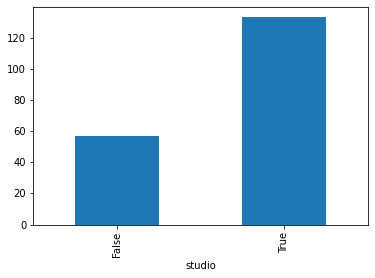

In [145]:
df.query("rooms == 0").groupby("studio")["rooms"].count().plot.bar();

Большинство - это студии. Поэтому для них оставляем всё как есть.
Для не студий: может это апартаменты и квартиры с открытой планировкой?

In [146]:
df.query('(rooms == 0) and (not studio or not open_plan or not is_apartment)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,9.1,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,9.1,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,9.1,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,9.1,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,18.00,7,False,...,9.1,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,9.1,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,False,...,9.1,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,18.00,8,False,...,9.1,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,False,...,9.1,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Эти квартиры (без признаков которые обозначают отсутствие комнат в привычном понимании) по большей части однокомнатные, но есть и двух и трёх комнатные.
Можем ввести примерную оценку до 44 метров - однокомнатные, 44 - 62 двухкомнатные дадее трёхкомнатные и заполнить нули этими значениями.

In [147]:
index_studio = df['studio'] | df['open_plan'] | df['is_apartment']
print(index_studio.sum())
def change_rooms(row):
    S = row['total_area']
    if S < 44:
        return 1
    elif 44 < S < 62:
        return 2
    else:
        return 3
    
df.loc[(df['rooms'] == 0) & ~index_studio, 'rooms'] = df[(df['rooms'] == 0) & ~index_studio].apply(change_rooms, axis=1)
    

257


Выведем гистограмму по число комнат и распределение.

In [148]:
df['rooms'].value_counts()

2     7685
1     7668
3     5551
4     1100
5      285
0      190
6       83
7       42
8        7
9        4
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

После семи комнат предложений считанные единицы - можем резать.

In [149]:
df = df.query('rooms <= 7')

##### Высота потолков

Высота потолков обычно регламентирована и вряд ли может выражаться двухзначным числом. По общедоступным сведениям последние 20 лет высота потолков в элитных домах обычно не превышала 3,3 м, однако в последние годы на рынке появились проекты с потолками высотой от 4 до 10 м. 
Но выведем по порядку все строки с потолками от 10 до 20 "метров".

In [150]:
df.query("10 < ceiling_height < 20").sort_values(by="ceiling_height", ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,9.1,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315.0


Судя по цене и остальным параметрам, они явно не относятся к категории супер-премиум, поэтому приравняем потолок к медиане.

In [151]:
df.loc[(10 < df["ceiling_height"]) & (df["ceiling_height"] < 20),
       "ceiling_height"] =  df["ceiling_height"].median()

После 20 скорее всего просто указали в дм (забыли зяпятую).

In [152]:
df.loc[df["ceiling_height"] >= 20,
       "ceiling_height"] = df.loc[df["ceiling_height"] >= 20,
                                  "ceiling_height"]/10

Возвращаемся к пропускам в высоте потолка. Заполняем медианой.

In [153]:
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].median())

То что осталось меньше 2 м. тоже можно заполнить медианой.

In [154]:
df.loc[2 > df["ceiling_height"],"ceiling_height"] =  df["ceiling_height"].median()

##### Общее число этажей

Самое высотное жилое здание в Спб. Лахта-центр 88 этажей и Лидер Тауэр - 42 этажа.
Отсортируем строки по этажности зданий и выведем 10 самых этажных.

In [155]:
df.sort_values(by="floors_total", ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.40,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.00,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17,1,2.65,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
397,15,5990000.0,54.0,2018-03-22,2,2.65,36,21.4,28,False,...,18.70,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,12.00,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
12888,7,7600000.0,70.0,2016-11-18,3,2.70,35,36.5,27,False,...,23.10,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,413.0
18629,20,5700000.0,54.0,2017-12-08,1,2.65,35,21.0,31,False,...,18.00,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,128.0
7236,10,4599000.0,42.0,2019-01-10,1,2.65,35,15.0,12,False,...,11.00,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,72.0
21809,20,10600000.0,77.0,2019-04-16,2,2.65,35,39.0,11,False,...,14.00,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN


60 и 52 с точки выглядят подозрительно. Но 52-этажку дейтсвительно хотели строить, а вот 60 этажки нет и не было. Но 52 впринципе выброс. Ограничимся 40.

In [157]:
df = df.query("floors_total < 40", engine='python')

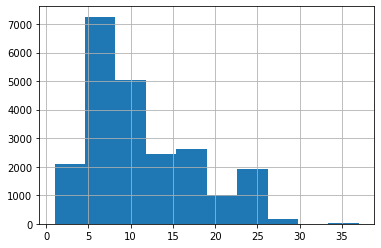

In [158]:
df["floors_total"].hist();

Гистограмма выглядит логично.

Проверим взлетевшие квартиры.

In [160]:
df.query("floor > floors_total", engine="python") 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


По этажам и числу балконов нетипичных значений не обнаружено. Картографические данные считаем точными.

##### Число дней объявления

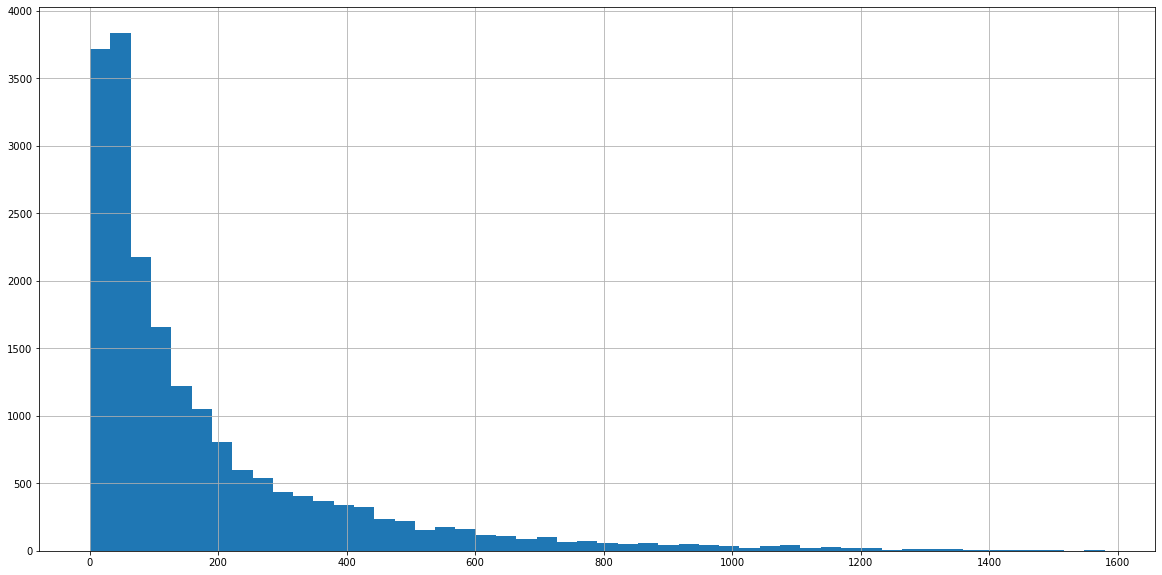

In [161]:
df['days_exposition'].hist(bins=50, figsize=(20,10));


In [162]:
print(f'99% - {df["days_exposition"].quantile(q=0.99):.0f}')

99% - 1073


Кажется что после 1000 вообще не имеет смысла рассмтривать.

In [163]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22602 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22602 non-null  int64         
 1   last_price            22602 non-null  float64       
 2   total_area            22602 non-null  float64       
 3   first_day_exposition  22602 non-null  datetime64[ns]
 4   rooms                 22602 non-null  int64         
 5   ceiling_height        22602 non-null  float64       
 6   floors_total          22602 non-null  Int64         
 7   living_area           22602 non-null  float64       
 8   floor                 22602 non-null  int64         
 9   is_apartment          22602 non-null  bool          
 10  studio                22602 non-null  bool          
 11  open_plan             22602 non-null  bool          
 12  kitchen_area          22602 non-null  float64       
 13  balcony         

In [164]:
df = df.query("days_exposition < 1000")

In [165]:
# check
df.shape

(19290, 22)

Проверка статистики:

In [166]:
print(f"Осталось исходного датасета: {len(df)/N_BEFORE_PROCESSING:.1%}")
df.describe()

Осталось исходного датасета: 81.4%


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19290.000000,1.929000e+04,19290.000000,19290.000000,19290.000000,19290.0,19290.000000,19290.000000,19290.000000,19290.000000,14967.000000,14986.000000,19290.000000,6499.000000,19290.000000,7395.000000,19290.000000
mean,9.662208,5.873880e+06,57.732077,1.998341,2.688379,10.907258,32.503823,5.991135,10.056720,0.603059,28923.077504,14408.762311,0.459668,490.065087,0.584500,524.209466,167.952618
std,5.651531,5.845913e+06,27.840917,0.988711,0.222315,6.608416,17.804619,4.910118,4.457662,0.953902,12768.052257,8518.786293,0.738544,341.888192,0.875196,277.128944,187.440211
min,0.000000,5.600000e+05,18.000000,0.000000,2.000000,1.0,6.000000,1.000000,2.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.900000,1.000000,2.600000,5.0,18.000000,2.000000,7.200000,0.000000,18449.000000,9700.000000,0.000000,288.000000,0.000000,303.000000,44.000000
50%,9.000000,4.500000e+06,50.700000,2.000000,2.650000,9.0,30.000000,4.000000,9.100000,0.000000,26957.000000,13238.500000,0.000000,452.000000,0.000000,510.000000,94.000000
75%,14.000000,6.477500e+06,67.275000,3.000000,2.700000,16.0,41.000000,8.000000,11.100000,1.000000,37434.000000,16429.500000,1.000000,613.000000,1.000000,733.500000,223.000000
max,50.000000,1.300000e+08,297.500000,7.000000,10.000000,37.0,211.000000,33.000000,48.300000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,999.000000


**Вывод:** Большая часть аномалий исправлена. Осталось > 80% исходного датасета.

### Посчитайте и добавьте в таблицу новые столбцы

Добаавим следующие столбцы.
- цена одного квадратного метра (cost_per_square);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) (ddayofweek);
- месяц публикации объявления (month);
- год публикации объявления (year);
- тип этажа квартиры (значения — «первый», «последний», «другой») (floor_type);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) (center_km).

In [168]:
df['cost_per_square'] = df['last_price'] / df['total_area']
df['dayofweek'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

def floor_type(row):
    if pd.isna(row["floor"]):
        return "другой"
    elif row["floor"] == 1:
        return "первый"
    elif row["floor"] == row["floors_total"]:
        return "последний"
    else:
        return "другой"

df['floor_type'] = df.apply(floor_type, axis=1)
df['center_km'] = np.floor((df['cityCenters_nearest'] / 1000))

<ipython-input-168-11885ec09091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_per_square'] = df['last_price'] / df['total_area']
<ipython-input-168-11885ec09091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['first_day_exposition'].dt.dayofweek
<ipython-input-168-11885ec09091>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [169]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square,dayofweek,month,year,floor_type,center_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,13.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,6.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN


**Вывод:** Необходимые для дальнешего анализа столбцы добавлены.

### Проведите исследовательский анализ данных

####  Изучение параметров объектов с помозью гистограммм.
###### Общая площадь
В работе с аномальными значениями мы уже определили, что впринципе существуют как очень большие так и очень маленькие квартиры. Очень больших мало, но они значительно удлиняют хвост гистограммы, поэтому их желательно не учитывать. Предлагаю найти перцентиль 99% и обрезать гистограмму.

168.64400000000023


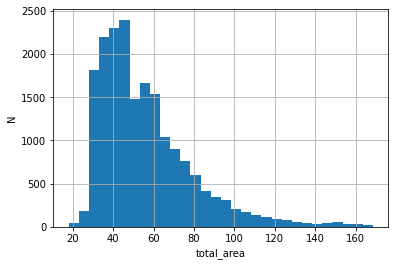

In [170]:
par = "total_area"
tot_max = df[par].quantile(q=0.99)
print(tot_max)
ax = df[par].hist(range=(df[par].min(), tot_max), bins=30);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** 99% квартир имеют общую площадь до 170 кв. метров, что логично. Площадь большинства лежит в диапазоне от 25 до 80 метров. Что соответствует типовым квартирам от 1 до 3-х комнат.

##### Жилая площадь
Поступаем так же, как и с общей.

98.52200000000012


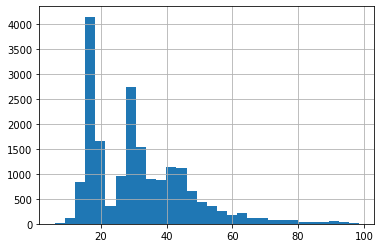

In [171]:
par = "living_area"
live_max = df[par].quantile(q=0.99)
print(live_max)
df[par].hist(range=(df[par].min(), live_max), bins=30);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** К сожалению здесь картина не такая хорошая. Есть всплески вызванные скорее всего заполнением пропущенных значений медианой. Если не  брать их в расчет то наиболее типичные жилые площали 30-40 кв.м. 

98.52200000000012


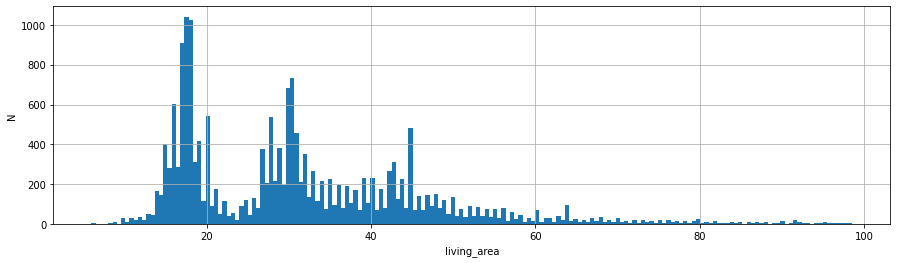

In [172]:
# check
par = "living_area"
live_max = df[par].quantile(q=0.99)
print(live_max)
ax = df[par].hist(range=(df[par].min(), live_max), bins=180, figsize = (15,4))
ax.set_xlabel(par)
ax.set_ylabel("N");

##### Площадь кухни
Поступаем так же, как и с общей.

29.0


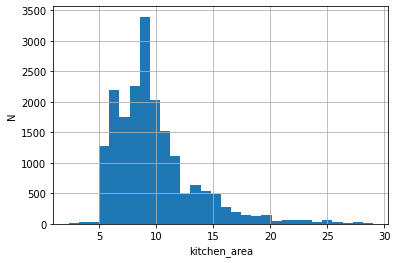

In [173]:
par = "kitchen_area" 
ka_max = df[par].quantile(q=0.99)
print(ka_max)
ax = df[par].hist(range=(df[par].min(), ka_max), bins=30);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Немногие могут похвастать большой кухней. Большинство кухонь 6-11 кв. метров. Пик на графике - следствие предобработки и заполнения медианой.

##### Цена объекта

27715400.000000082


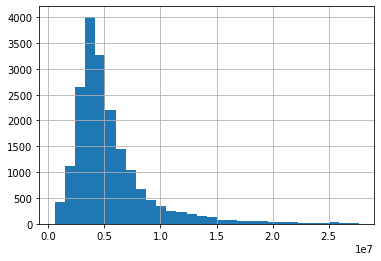

In [174]:
par = "last_price"
p_max = df[par].quantile(q=0.99)
print(p_max)
df[par].hist(range=(df[par].min(), p_max), bins=30);

Даже с такой обрезкой цена варьирует на 2 порядка. Но очень дорогих мало уменьшаем максимальную цену до 90 перцентиля.

9800000.0


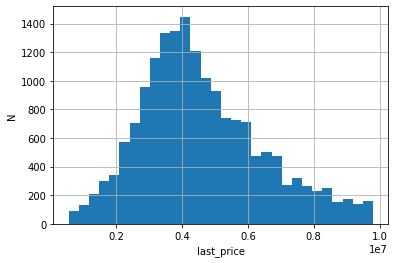

In [175]:
p_max = df[par].quantile(q=0.90)
print(p_max)
ax = df[par].hist(range=(df[par].min(), p_max), bins=30);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Распеределение чем то походит на нормальное. Большинство цен лежит в диапазоне от 2 до 7 млн. р.

##### Количество комнат
Здесь по отработанной методике отрезаем хвост. Кроме того явно нужно уменьшить число корзин.

5.0


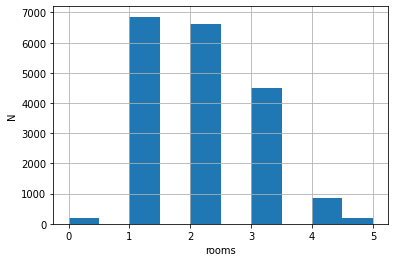

In [176]:
par = 'rooms'
r_max = df[par].quantile(q=0.99)
print(r_max)
ax = df[par].hist(range=(0, r_max));
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** На рынке больше всего однушек и двушек с примерно равным количеством между собой. Меньше трёшек. Значительно меньше других типов квартир.

##### Высота потолков

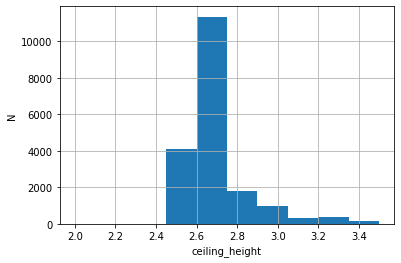

In [177]:
par = "ceiling_height"
ax = df[par].hist(range=(df[par].min(), df[par].quantile(q=0.99)));
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Ясно что высота потолка колеблится в основном от 2.5 до 2.8 метров, что соотвествует данным из других источников (строительные нормы).

##### Этаж квартиры

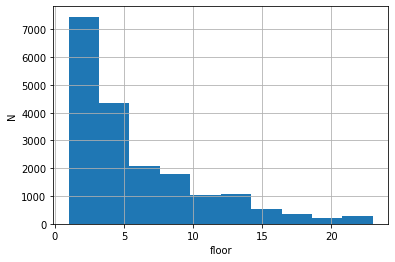

In [178]:
par = "floor"
ax = df[par].hist(range=(1, df[par].quantile(q=0.99)));
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Большинство квартир продается на 1-5 этажах.

##### Тип этажа квартиры

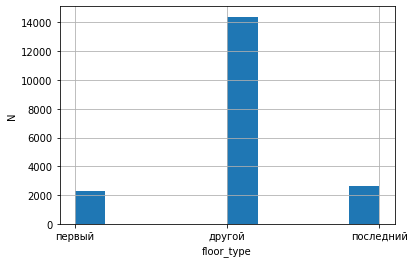

In [179]:
par = "floor_type" 
ax = df["floor_type"].hist();
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Большинство квартир продаются не на первом и не на последем этаже. Но сравнивать между собой последние категории сложно так как для одноэтажных зданий - первый, он же последний.

##### Общее количество этажей в доме
Уберём единичные предложения в высотках. И построим гистограмму

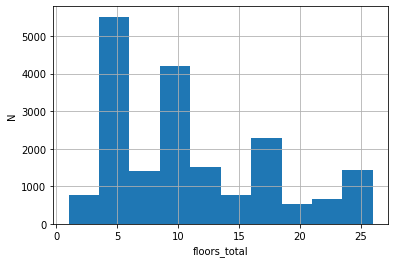

In [181]:
par = "floors_total" 
ax = df[par].hist(range=(1, df[par].quantile(q=0.99)));
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод.** Чаще всего встречаются пятиэтажки (сталинки и хрущевки) и девятиэтажки (брежневки и более современные). Так же относительно много квартир в 16-17 этажных домах.

##### Расстояние до центра города в метрах

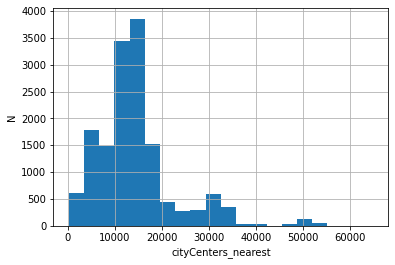

In [182]:
par = "cityCenters_nearest"
ax = df[par].hist(bins=20);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Большинство продаваемых квартир расположены в ~3-15 км от центра.

##### Расстояние до ближайшего аэропорта

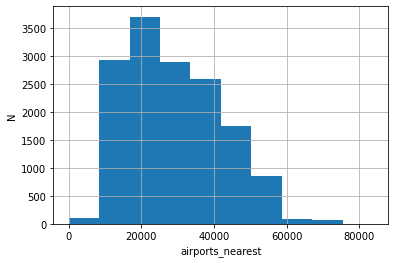

In [183]:
par = "airports_nearest"
ax = df[par].hist(bins=10);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Большинство квартир расположено на расстоянии примерно 20 +/- 10 км. от Пулково.

##### Расстояние до ближайшего парка

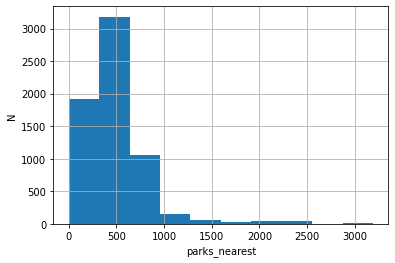

In [184]:
par = "parks_nearest"
ax = df[par].hist(bins=10);
ax.set_xlabel(par);
ax.set_ylabel("N");

**Вывод:** Как ни странно, но большинство картир в шаговой доступности до парка.

##### День публикации объявления

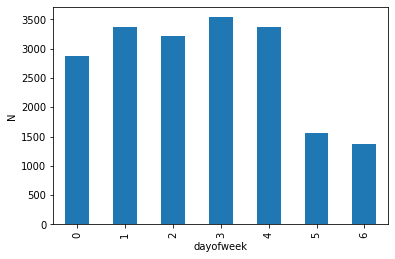

In [185]:
par = "dayofweek"
ax = df.pivot_table(index=par, values='last_price', aggfunc='count').plot.bar();
ax.set_xlabel(par);
ax.set_ylabel("N");
ax.get_legend().remove();

**Вывод:** Большинство объявлений публикуются во вторник четверг и пятницу. В выходные - значительно меньше.

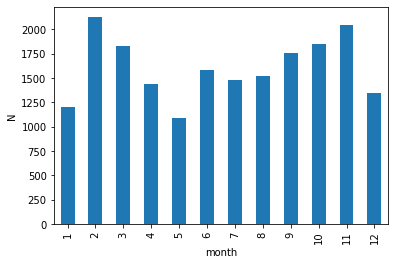

In [186]:
par = "month"
ax = df.pivot_table(index=par, values='last_price', aggfunc='count').plot.bar();
ax.set_xlabel(par);
ax.set_ylabel("N");
ax.get_legend().remove();

**Вывод:** Январь, май, и декабрь - полный штиль. Новогодние и майские праздники и закрытие года. В феврале и ноябре - больше всего.

#### Как быстро продавались квартиры?
**Гистограмма**

Ограничим 95% перцентилем.

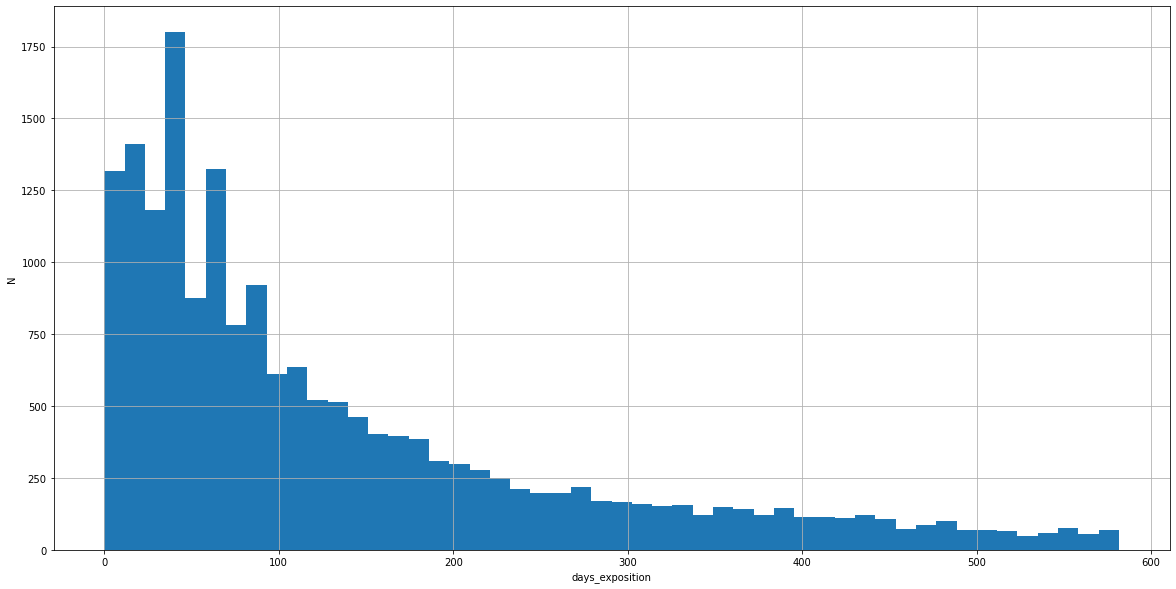

In [187]:
par = "days_exposition"
ax = df[par].hist(bins=50, figsize=(20, 10), range=(0, df[par].quantile(q=0.95)));
ax.set_xlabel(par);
ax.set_ylabel("N");

**Описательная статистика**

In [188]:
df["days_exposition"].describe()

count    19290.000000
mean       167.952618
std        187.440211
min          1.000000
25%         44.000000
50%         94.000000
75%        223.000000
max        999.000000
Name: days_exposition, dtype: float64

**Вывод:** Типичное время продажи составляе примерно 100 дней. Быстрые продажи в течении месяца. Долгие продажи от ~250 дней. Так как мы имеем дело с распределением Пуассона для определения типичного значения  среднее не годится.

Повнимательнее посмотрим на первые 100 дней.

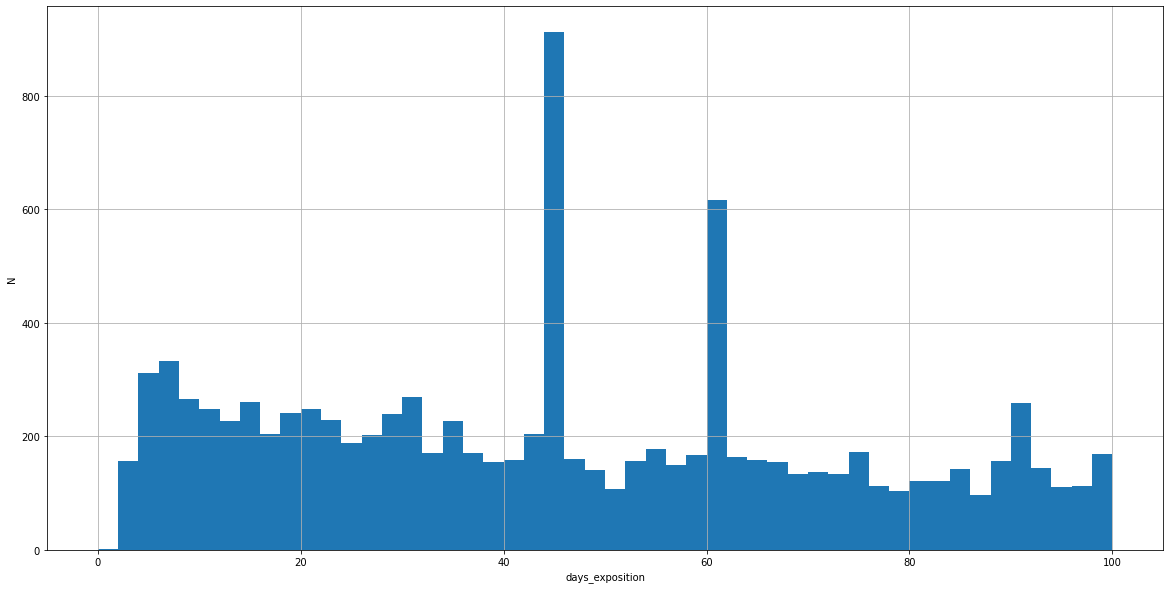

In [189]:
ax = df[par].hist(bins=50, figsize=(20, 10), range=(0, 100));
ax.set_xlabel(par);
ax.set_ylabel("N");

Очень интересные пики в районе 45, 60, 90 дней, котрые соотвествуют срокам публикации объявлений Яндекс Недвижимости в зависимости от цены квартиры.:
- до 4,5 млн — 45 дней
- от 4,5 до 10 млн — 60 дней
- от 10 млн — 90 дней

#### Факторы влияния на цену

##### Общая площадь

Строим диаграмму рассеяния и считаем коэффициент корреляции Пирсона. Ограничимся типичными значениями для графика: цена до 20 млн. площадь до 200 кв.м. (99%). 

r= 72.7%


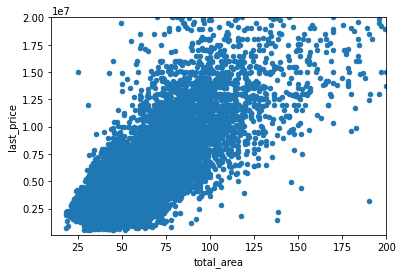

In [190]:
df.plot.scatter(x='total_area', y='last_price', xlim=(10, 200), ylim=(100_000, 20_000_000));
print(f"r= {df['total_area'].corr(df['last_price']):.1%}")

**Вывод:** Зависимость явная и прямо пропорциональная. Коэффициент Пирсона соотвествует высокой связи по шкале Чедока. Применим критерий Спирмена:

In [191]:
print(f"r(Спирмена) = {spearmanr(df['total_area'], df['last_price']).correlation:.1%}")

r(Спирмена) = 74.0%


##### Жилой площади

r= 62.1%


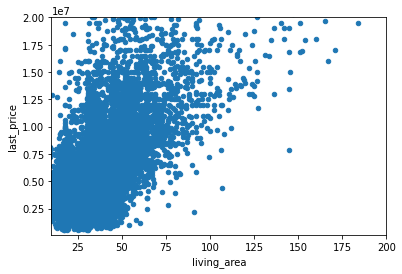

In [192]:
df.plot.scatter(x='living_area', y='last_price', xlim=(10, 200), ylim=(100_000, 20_000_000));
print(f"r= {df['living_area'].corr(df['last_price']):.1%}")

**Вывод:** Корреляция прямая и тоже заметная, хотя и меньше чем от общей.

##### Площадь кухни

r= 48.9%


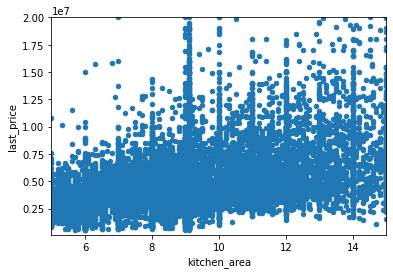

In [193]:
df.plot.scatter(x='kitchen_area', y='last_price', xlim=(5, 15), ylim=(100_000, 20_000_000));
print(f"r= {df['kitchen_area'].corr(df['last_price']):.1%}")

**Вывод:** Зависимость есть но она слабее, чем от общей и прямо пропорциональная. На графике имеются вертикальные линии - типичные размеры кухонь.
Предлагаю разбить на дополнительные диапазоны по площади кухни и посчитать медианы цены по группам.

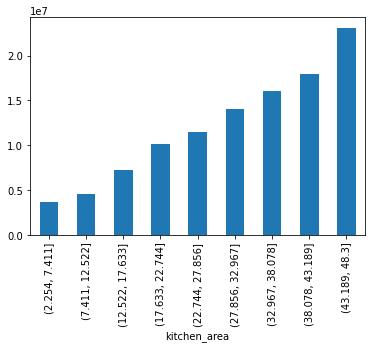

In [194]:
df.groupby(pd.cut(df["kitchen_area"], bins=9))['last_price'].median().plot.bar();

**Вывод:** Больше площадь кухни - более высокий ценовой класс.

##### Количество комнат
Здесь довольно маленький диапазон допустимых дискретных значений. Поэтому график рассеяния не показателен. Используем сводную таблицу медианной цены по числу комнат.

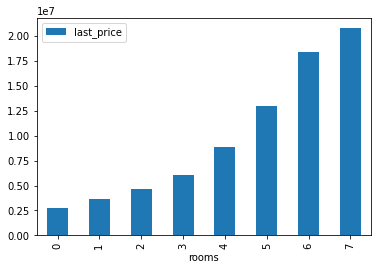

In [195]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot.bar();

**Вывод:** До семи комнат цена растет, но зависимость нелинейна.

##### Этаж, на котором расположена квартира (первый, последний, другой)
Используем сводную таблицу по типу этажа медианы цены

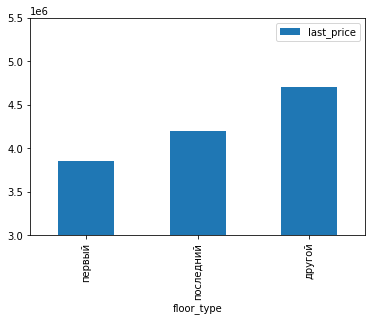

In [196]:
(df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
 .sort_values(by=('last_price'))
 .plot.bar(ylim=(3_000_000, 5_500_000)));

**Вывод:** Впринципе и без использования стат критериев можно сделать вывод, о том что дороже стоят квартиры на не первом и не последнем этаже. На втором месте последний этаж, на последнем - первый. Тут имеются, частично оправданные, предубеждения насчёт первого (шум с улицы, проблемы с канализацией, необходимость решеток на окна) и последнего (проблемы с протечками крыши) этажа.

##### Даты размещения объявления (день недели, месяц, год)
Строим графики по сводным таблицам медианной цены по параметрам даты.

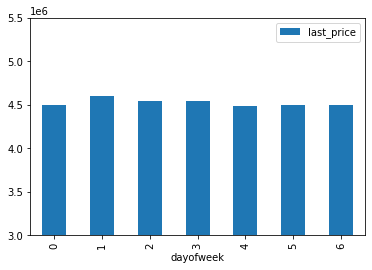

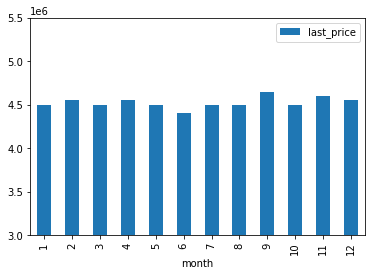

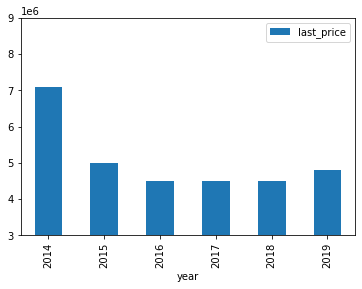

In [197]:
df.pivot_table(index='dayofweek', values='last_price',
               aggfunc='median').plot.bar(ylim=(3_000_000, 5_500_000));
df.pivot_table(index='month', values='last_price',
               aggfunc='median').plot.bar(ylim=(3_000_000, 5_500_000));
df.pivot_table(index='year', values='last_price', 
               aggfunc='median').plot.bar(ylim=(3_000_000, 9_000_000));

**Вывод:** От дня недели подачи объявления медианная цена не зависит. От месяца зависит не сильно - в мае-июне дешевле, но ненамного. Самое интересное по годам. В 2014 году была самая высокая (неправдоподобная) медианная цена, а потом она резко упала и держалась до 2018 года почти постоянной, потом стала расти. Рассмотрим число объявлений квартир за это время.

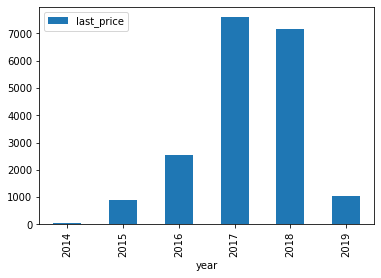

In [198]:
df.pivot_table(index='year', values='last_price', aggfunc='count').plot.bar();

**Уточнение:** В 2014 году было подано очень мало объявлений через сервис, поэтому было бы некорректно делать выводы по этому году.

#### Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.

In [199]:
most_favorite_places = (df.pivot_table(index='locality_name', 
                                       values='cost_per_square', aggfunc="count")
                        .sort_values(by='cost_per_square', ascending=False)
                        .head(10))
most_favorite_places.columns = ("n_ads",)
most_favorite_places

,n_ads
locality_name,
Санкт-Петербург,12852
поселок Мурино,496
поселок Шушары,392
Всеволожск,317
поселок Парголово,297
Колпино,296
Пушкин,288
деревня Кудрово,271
Гатчина,260


In [200]:
places_cps = (df.query('locality_name in @most_favorite_places.index')
              .pivot_table(index='locality_name', values='cost_per_square',
                          aggfunc=lambda x: round(np.mean(x), 2))
              .sort_values(by='cost_per_square', ascending=False))
places_cps

,cost_per_square
locality_name,
Санкт-Петербург,110625.24
Пушкин,101932.82
деревня Кудрово,92000.53
поселок Парголово,89323.56
поселок Мурино,85338.38
поселок Шушары,77518.25
Колпино,74706.43
Всеволожск,68641.46
Гатчина,67929.91


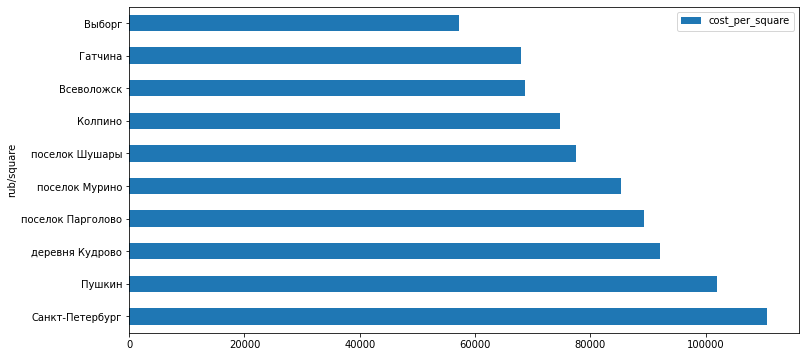

In [201]:
ax = places_cps.plot.barh(figsize=(12, 6));
ax.set_ylabel("rub/square");

**Вывод:** Разница средней стоимости одного кв.м. почти в два раза! Наиболее дорогое жильё в Санкт-Петербурге. На втором месте его внутригородское муниципальное образование - Пушкин (Царское Село). На третьем - деревня Кудрово (сейчас уже город) имеющая общую административную границу с Санкт-Петербургом. Несмотря на то, что Выборг крупный административный центр с развитой инфраструктурой цена на кв. метр. там самая низкая из 10 пунктов с самым большим количеством объявлений, видимо ввиду отдалённости от Санкт-Петербурга.

#### Cредняя цена каждого километра от центра в Санкт-Петербурге 

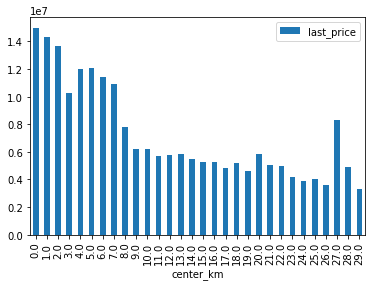

In [202]:
(df.query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='center_km', values='last_price')
 .plot.bar()
);

**Вывод:** Самое дорогое жильё в центре города. Это очевидно. Вторая границы цен проходит на рассотоянии ~8 км. Сгладим нашу картину используя дискретные диапазоны по километражу.

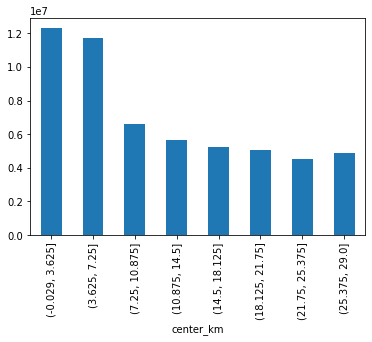

In [203]:
(df.query('locality_name == "Санкт-Петербург"')
.groupby(pd.cut(df.query('locality_name == "Санкт-Петербург"')['center_km'],
                bins=8))['last_price'].mean().plot.bar());

Так оно и есть граница цен проходит где то ~8 км. от центра.

### Общий вывод

Осуществлена загрузка, предобработка и анализ данных по объявлениям о продаже квартир. Где это было возможно и еужно заполнены пропуски, исправлены аномальные значения, удалены неявные дубликаты и изменены типы данных.

99% квартир имеют общую площадь до 200 кв. метров, что логично. Площадь большинства лежит в диапазоне от 25 до 100 метров. Что соответствует типовым квартирам от 1 до 3-х комнат.
Большинство кухонь 6-11 кв. метров. Большинство цен лежит в диапазоне от 2 до 7 млн. р. На рынке больше всего однушек и двушек с примерно равным количеством между собой. Меньше трёшек. Значительно меньше других типов квартир.
Типичная высота потолка колеблится в основном от 2.5 до 2.8 м. Большинство квартир продается на 1-5 этажах. Чаще всего встречаются пятиэтажки (сталинки и хрущевки) и девятиэтажки (брежневки и более современные). Так же относительно много квартир в 12-15 этажных домах.
Большинство продаваемых квартир расположены в ~3-15 км от центра, на расстоянии примерно 20 - 40 км. от Пулково. 

Типичное время продажи составляе примерно 100 дней. Быстрые продажи в течении месяца. Долгие продажи от ~250 дней. Так как мы имеем дело с распределением Пуассона для определения типичного значения  среднее не годится.

**Выводы по анализу цен:** Зависимость цены квартиры от общей площади явная и прямо пропорциональная.r(Спирмена) = 74.8%. От числа комнат зависимость тоже явная. Больше площадь кухни - более высокий ценовой класс. Дороже стоят квартиры на не первом и не последнем этаже. На втором месте последний этаж, на последнем - первый. От дня недели подачи объявления медианная цена не зависит. От месяца зависит не сильно - в мае-июне дешевле, но ненамного.
Наиболее дорогое жильё в Санкт-Петербурге. На втором месте его внутригородское муниципальное образование - Пушкин (Царское Село). На третьем - деревня Кудрово (сейчас уже город) имеющая общую административную границу с Санкт-Петербургом. Несмотря на то, что Выборг крупный административный центр с развитой инфраструктурой цена на кв. метр. там самая низкая из 10 пунктов с самым большим количеством объявлений, видимо ввиду отдалённости от Санкт-Петербурга.
Самое дорогое жильё в центре города. Вторая границы цен проходит на рассотоянии ~8 км. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод